In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

#  1. TẢI VÀ ĐỌC DỮ LIỆU
file_name = "processed_dulieuxettuyendaihoc.csv"

# Kiểm tra file trên Colab, nếu chưa có thì upload
if not os.path.exists(file_name):
    print(f"File {file_name} không tồn tại. Vui lòng tải lên.")
    from google.colab import files
    uploaded = files.upload()

# Đọc dữ liệu
df = pd.read_csv(file_name, delimiter=',')

# 1: Thống kê dữ liệu

In [13]:
# 1: Hãy sắp xếp dữ liệu điểm DH1 theo thứ tự tăng dần
dftuyensinh_sorted_dh1 = df.sort_values(by=['DH1'])
print("\n 1. Danh sách sắp xếp theo DH1 tăng dần ")
print(dftuyensinh_sorted_dh1)

# 2: Hãy sắp xếp dữ liệu điểm DH2 tăng dần theo nhóm giới tính
dftuyensinh_sorted_dh2_gt = df.sort_values(by=['GT', 'DH2'])
print("\n 2. Danh sách sắp xếp theo GT và DH2 tăng dần ")
print(dftuyensinh_sorted_dh2_gt)

# Định nghĩa các hàm phân vị (Quartiles) cho Pivot Table
def Q1(x): return x.quantile(0.25)
def Q2(x): return x.quantile(0.50)
def Q3(x): return x.quantile(0.75)

# Danh sách các hàm thống kê cần tính
agg_funcs = ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', Q1, Q2, Q3]

# 3: Tạo pivot-table thống kê DH1 theo KT
pivot_kt = pd.pivot_table(df, values='DH1', index=['KT'], aggfunc=agg_funcs)
print("\n 3. Thống kê DH1 theo KT ")
print(pivot_kt)

# 4: Tạo pivot-table thống kê DH1 theo KT và KV
pivot_kt_kv = pd.pivot_table(df, values='DH1', index=['KT', 'KV'], aggfunc=agg_funcs)
print("\n 4. Thống kê DH1 theo KT và KV ")
print(pivot_kt_kv)

# 5: Tạo pivot-table thống kê DH1 theo KT, KV và DT
pivot_kt_kv_dt = pd.pivot_table(df, values='DH1', index=['KT', 'KV', 'DT'], aggfunc=agg_funcs)
print("\n 5. Thống kê DH1 theo KT, KV và DT ")
print(pivot_kt_kv_dt)


 1. Danh sách sắp xếp theo DH1 tăng dần 
    STT   T1   L1   H1   S1   V1   X1   D1   N1   T2  ...  TBM1  TBM2  TBM3  \
53   54  4.9  5.9  6.2  5.6  5.9  5.0  7.0  5.6  6.1  ...  5.69  6.26  6.02   
43   44  6.6  7.2  5.9  6.9  7.6  8.1  7.3  6.7  6.3  ...  7.05  6.61  6.77   
5     6  9.3  7.6  7.9  8.6  7.0  7.3  7.7  7.9  9.6  ...  7.96  8.54  7.38   
72   73  5.5  6.6  7.2  7.6  5.5  6.7  6.7  5.2  6.0  ...  6.20  5.88  6.22   
83   84  5.9  5.7  7.1  6.7  6.5  8.0  8.1  4.3  7.4  ...  6.47  7.11  7.47   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
6     7  2.8  3.9  5.5  6.9  5.0  7.3  4.6  5.2  4.4  ...  4.90  5.60  6.01   
11   12  7.9  7.0  9.1  8.6  6.1  7.0  5.6  9.0  8.2  ...  7.43  7.72  7.49   
23   24  5.3  6.3  5.7  6.9  5.9  7.5  6.6  5.1  6.4  ...  6.05  6.32  6.71   
24   25  2.4  4.1  3.6  5.5  5.9  5.6  4.9  4.2  3.3  ...  4.45  4.88  5.41   
97   98  8.8  5.5  7.4  7.7  6.2  7.3  8.1  4.5  9.5  ...  7.05  7.84  7.67   

    XL1  

# 2: Trình bày dữ liệu


==================== 1. Biến GT ====================
    Tần Số  Tần Suất (%)
GT                      
F       48          48.0
M       52          52.0


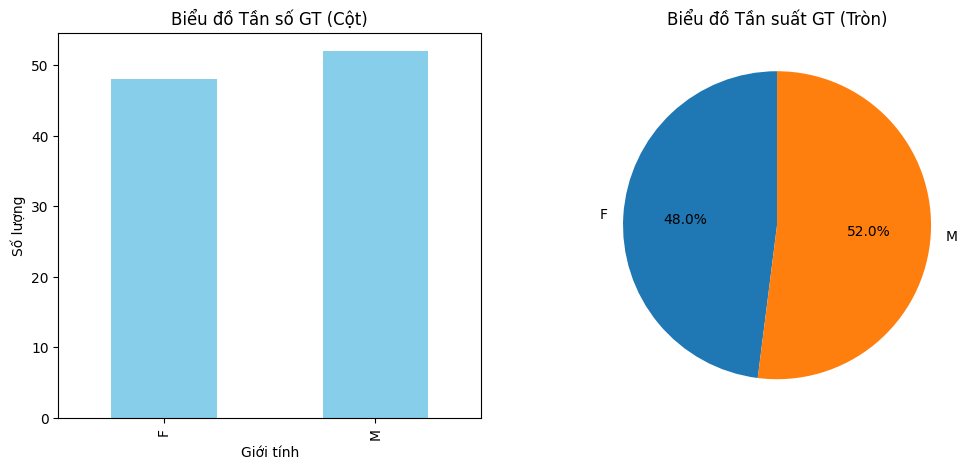


==================== 2. Biến US_TBM ====================
          US_TBM1     US_TBM2    US_TBM3
count  100.000000  100.000000  100.00000
mean     2.434480    2.559600    2.67176
std      0.391203    0.377656    0.29981
min      1.616000    1.768000    1.91600
25%      2.107000    2.223000    2.47300
50%      2.480000    2.588000    2.70600
75%      2.724000    2.893000    2.87400
max      3.232000    3.416000    3.31600


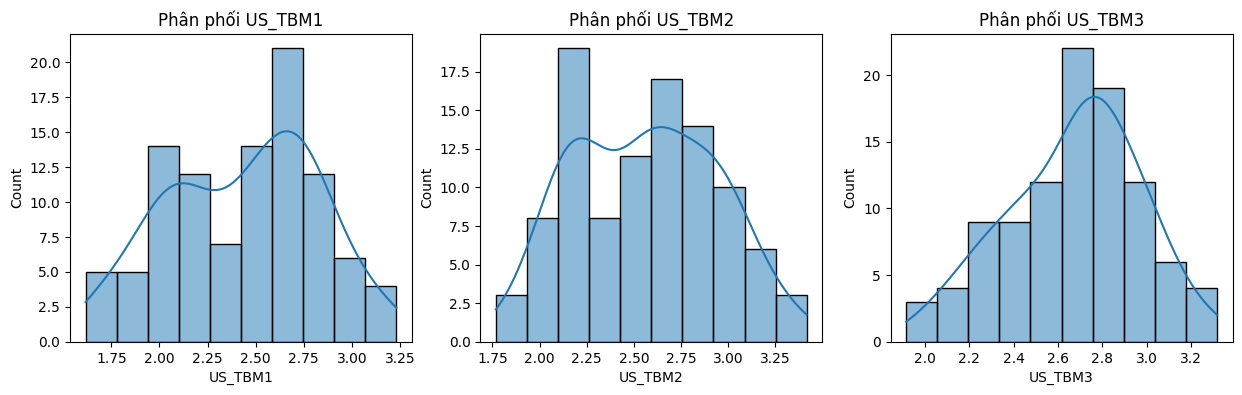


==================== 3. Biến DT (Học sinh Nam) ====================
     Tần Số  Tần Suất (%)
DT                       
0.0      50     96.153846
1.0       1      1.923077
6.0       1      1.923077


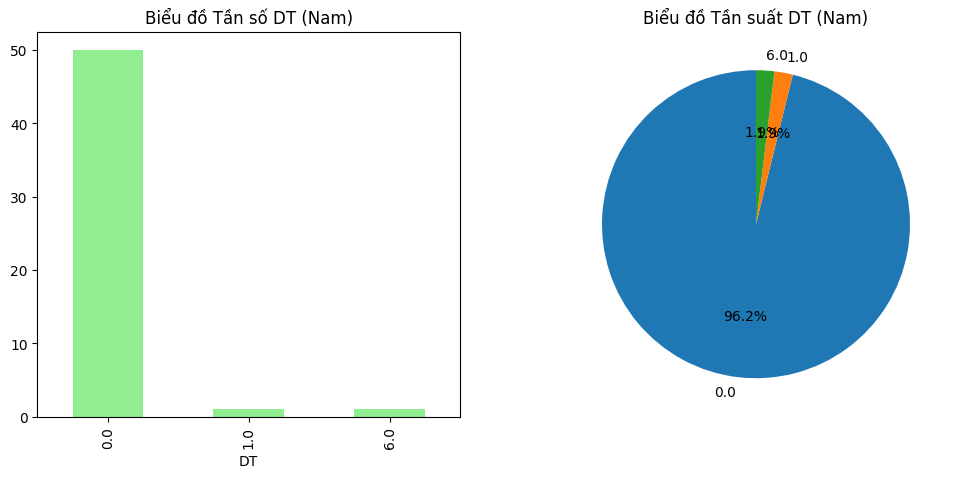


==================== 4. Biến KV (Nam, Kinh, Điểm thỏa điều kiện) ====================
     Tần Số  Tần Suất (%)
KV                       
1         2     33.333333
2         2     33.333333
2NT       2     33.333333


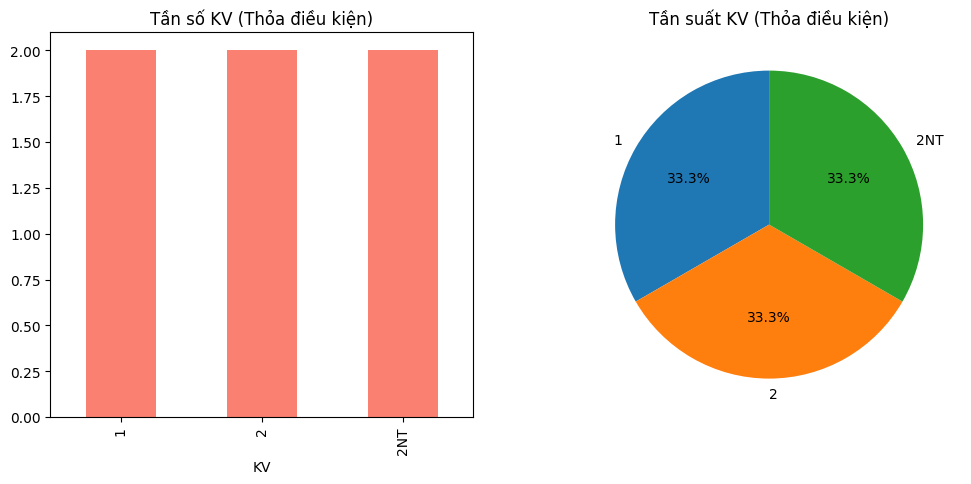


==================== 5. Biến DH (KV=2NT và Điểm >= 5.0) ====================

 Thống kê DH1 (KV=2NT, DH1>=5.0) 
count    4.000000
mean     6.062500
std      0.943729
min      5.250000
25%      5.250000
50%      6.000000
75%      6.812500
max      7.000000
Name: DH1, dtype: float64

 Thống kê DH2 (KV=2NT, DH2>=5.0) 
count    6.000000
mean     5.750000
std      1.129159
min      5.000000
25%      5.250000
50%      5.250000
75%      5.625000
max      8.000000
Name: DH2, dtype: float64

 Thống kê DH3 (KV=2NT, DH3>=5.0) 
count    6.000000
mean     5.750000
std      0.689202
min      5.000000
25%      5.125000
50%      5.750000
75%      6.375000
max      6.500000
Name: DH3, dtype: float64


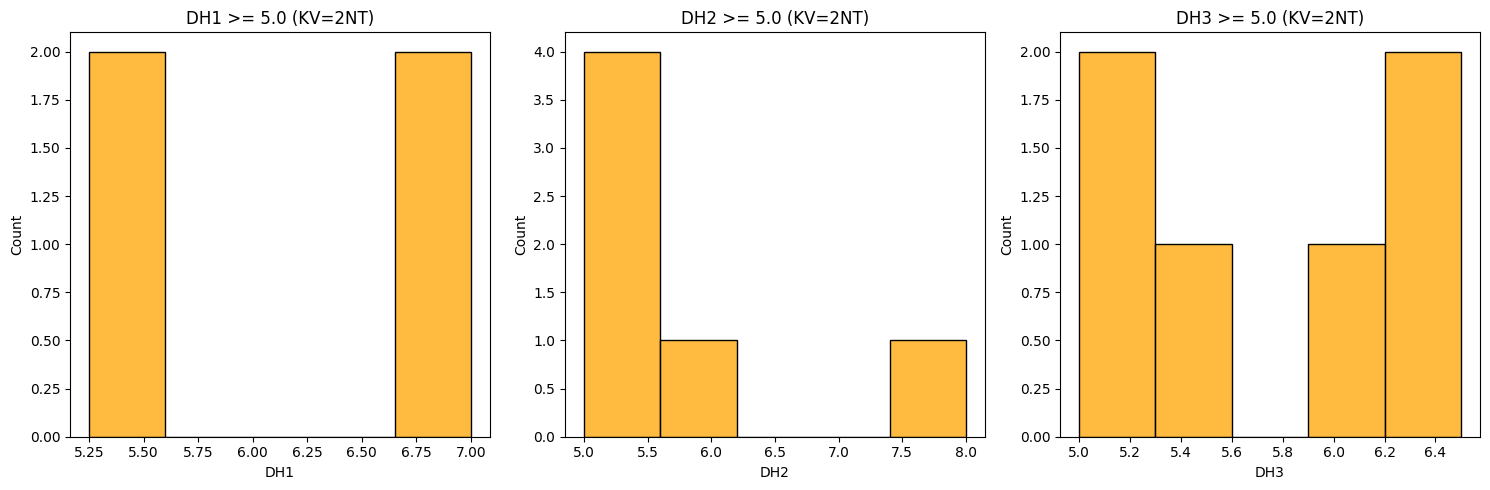

In [14]:
# 1: GT (Giới tính)
print("\n" + "="*20 + " 1. Biến GT " + "="*20)
# Lập bảng tần số và tần suất
gt_counts = df['GT'].value_counts().sort_index()
gt_percents = df['GT'].value_counts(normalize=True).sort_index() * 100
gt_table = pd.DataFrame({'Tần Số': gt_counts, 'Tần Suất (%)': gt_percents})
print(gt_table)

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))

# Biểu đồ cột
plt.subplot(1, 2, 1)
gt_counts.plot(kind='bar', color='skyblue')
plt.title('Biểu đồ Tần số GT (Cột)')
plt.ylabel('Số lượng')
plt.xlabel('Giới tính')

# Biểu đồ tròn
plt.subplot(1, 2, 2)
gt_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ Tần suất GT (Tròn)')
plt.ylabel('')
plt.show()

# 2: US_TBM1, US_TBM2, US_TBM3
print("\n" + "="*20 + " 2. Biến US_TBM " + "="*20)
cols_us = ['US_TBM1', 'US_TBM2', 'US_TBM3']
print(df[cols_us].describe())

# Vẽ biểu đồ phân phối (Histogram)
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols_us):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f'Phân phối {col}')
plt.show()

# 3: DT (Nam)
print("\n" + "="*20 + " 3. Biến DT (Học sinh Nam) " + "="*20)
# Lọc học sinh Nam
df_nam = df[df['GT'] == 'M']
dt_counts = df_nam['DT'].value_counts().sort_index()
dt_percents = df_nam['DT'].value_counts(normalize=True).sort_index() * 100
dt_table = pd.DataFrame({'Tần Số': dt_counts, 'Tần Suất (%)': dt_percents})
print(dt_table)

# Vẽ biểu đồ
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
dt_counts.plot(kind='bar', color='lightgreen')
plt.title('Biểu đồ Tần số DT (Nam)')

plt.subplot(1, 2, 2)
dt_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Biểu đồ Tần suất DT (Nam)')
plt.ylabel('')
plt.show()

# 4: KV (Nam, Kinh, Điểm cao)
print("\n" + "="*20 + " 4. Biến KV (Nam, Kinh, Điểm thỏa điều kiện) " + "="*20)
# Giả sử DT=0 là Kinh (phổ biến trong dữ liệu này), điều kiện DH
cond = (df['GT'] == 'M') & (df['DT'] == 0) & (df['DH1'] >= 5.0) & (df['DH2'] >= 4.0) & (df['DH3'] >= 4.0)
df_kv = df[cond]

if df_kv.empty:
    print("Không có dữ liệu thỏa mãn điều kiện.")
else:
    kv_counts = df_kv['KV'].value_counts().sort_index()
    kv_percents = df_kv['KV'].value_counts(normalize=True).sort_index() * 100
    kv_table = pd.DataFrame({'Tần Số': kv_counts, 'Tần Suất (%)': kv_percents})
    print(kv_table)

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    kv_counts.plot(kind='bar', color='salmon')
    plt.title('Tần số KV (Thỏa điều kiện)')

    plt.subplot(1, 2, 2)
    kv_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Tần suất KV (Thỏa điều kiện)')
    plt.ylabel('')
    plt.show()

# 5: DH1, DH2, DH3 >= 5.0 và KV 2NT
print("\n" + "="*20 + " 5. Biến DH (KV=2NT và Điểm >= 5.0) " + "="*20)

plt.figure(figsize=(15, 5))
for i, col in enumerate(['DH1', 'DH2', 'DH3']):
    # Lọc dữ liệu riêng cho từng biến theo
    subset = df[(df['KV'] == '2NT') & (df[col] >= 5.0)]

    print(f"\n Thống kê {col} (KV=2NT, {col}>=5.0) ")
    if subset.empty:
        print("Không có dữ liệu.")
    else:
        print(subset[col].describe())

        # Vẽ biểu đồ
        plt.subplot(1, 3, i+1)
        sns.histplot(subset[col], kde=False, bins=5, color='orange')
        plt.title(f'{col} >= 5.0 (KV=2NT)')
plt.tight_layout()
plt.show()

# 3: Trực quan hóa dữ liệu theo nhóm phân loại


--- Biểu đồ 1: Xếp loại học sinh nữ (XL1, XL2, XL3) ---


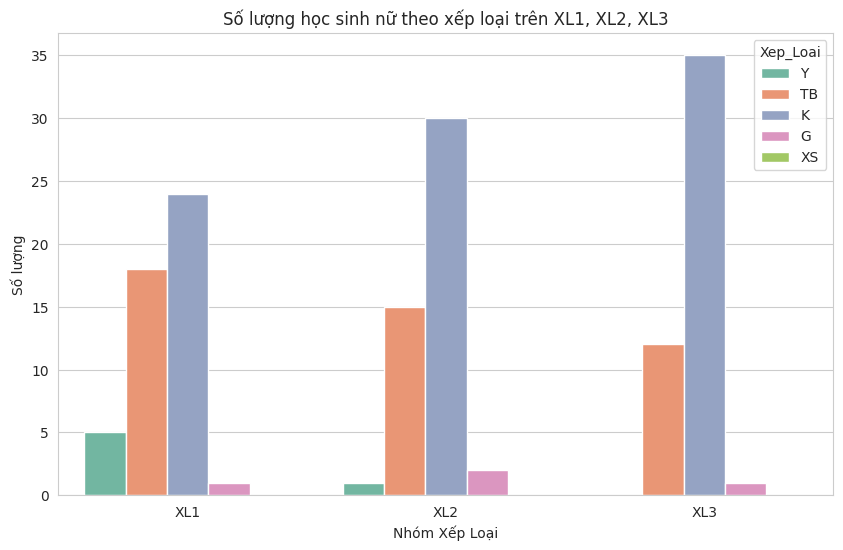


--- Biểu đồ 2: KQXT (Khối A, A1, B và KV 1, 2) ---


/tmp/ipython-input-1381211237.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_task2, x='KQXT_Label', palette='coolwarm')


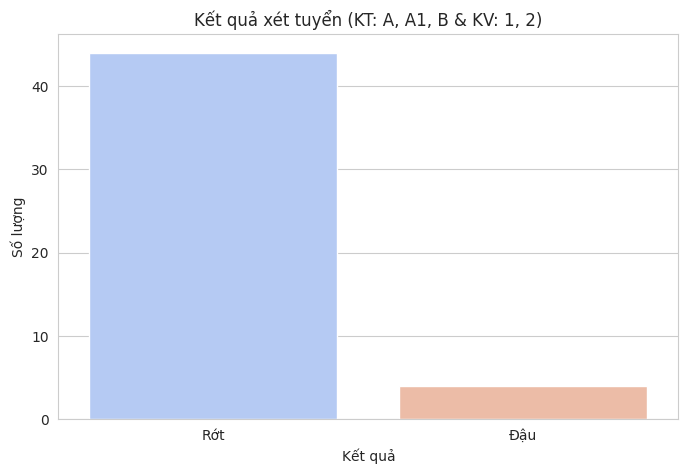


--- Biểu đồ 3: Số lượng thí sinh từng KV theo Khối thi ---


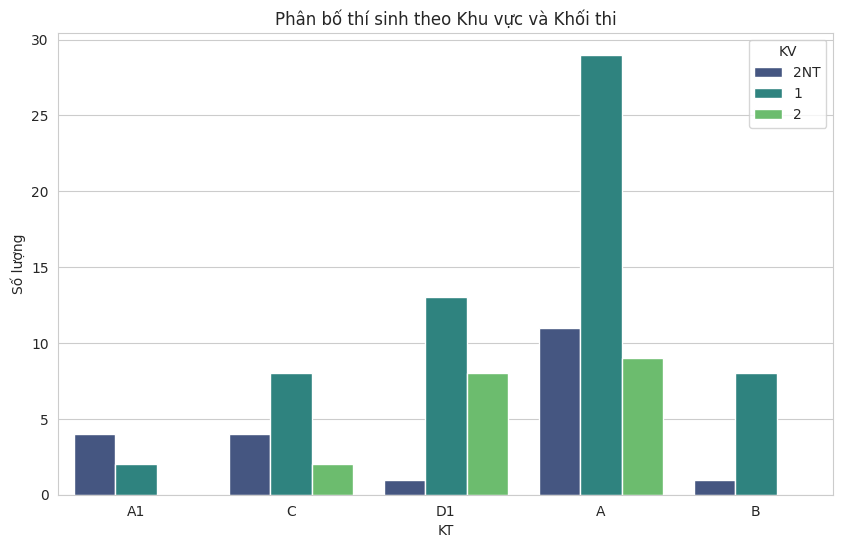


--- Biểu đồ 4: Đậu/Rớt theo Khối thi ---


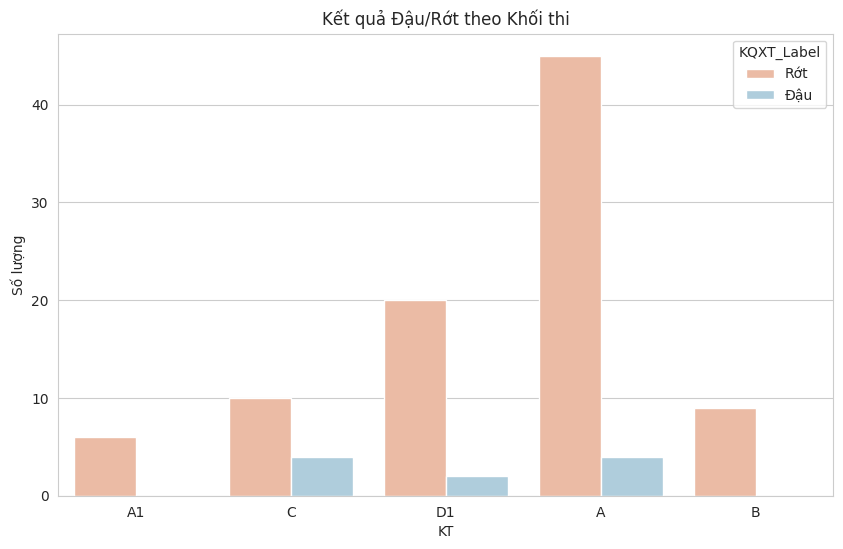


--- Biểu đồ 5: Đậu/Rớt theo Khu vực ---


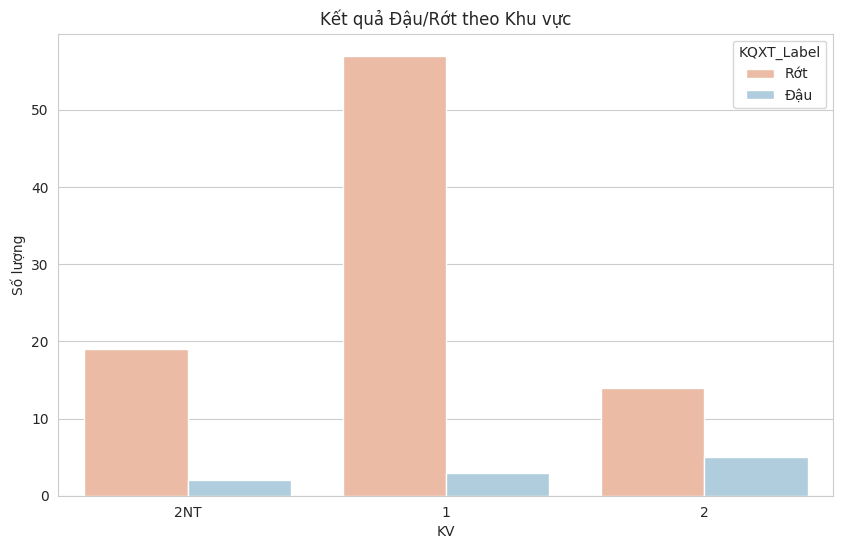


--- Biểu đồ 6: Đậu/Rớt theo Dân tộc ---


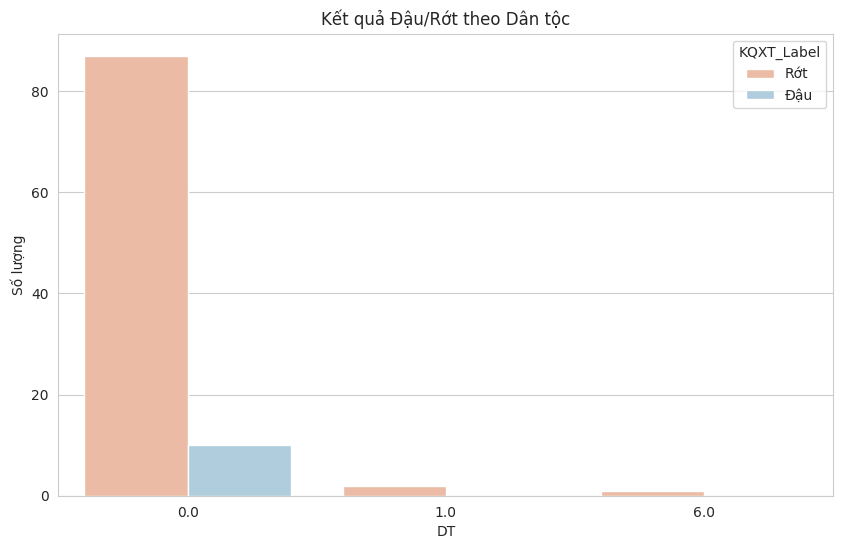


--- Biểu đồ 7: Đậu/Rớt theo Giới tính ---


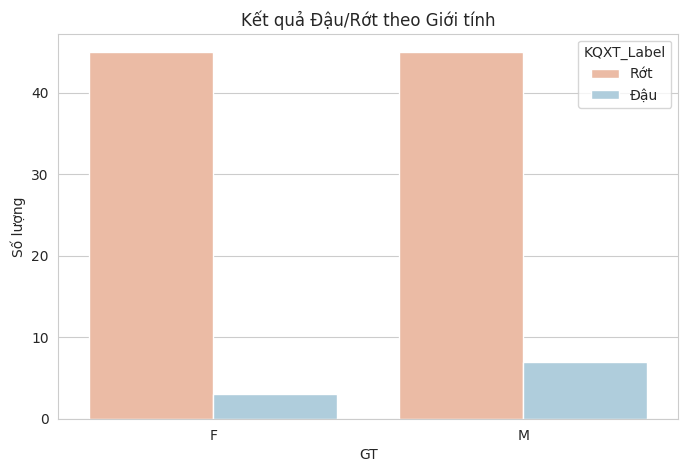

In [15]:
# Chuyển KV sang chuỗi để tránh lỗi hiển thị số
df['KV'] = df['KV'].astype(str)

# Map KQXT: 0 -> Rớt, 1 -> Đậu (để hiển thị rõ trên biểu đồ)
# Kiểm tra xem cột KQXT là số (0/1) hay chữ
if df['KQXT'].dtype in ['int64', 'float64']:
    df['KQXT_Label'] = df['KQXT'].apply(lambda x: 'Đậu' if x == 1 else 'Rớt')
else:
    df['KQXT_Label'] = df['KQXT']

# Thiết lập style
sns.set_style("whitegrid")

# --- 1: HỌC SINH NỮ TRÊN XL1, XL2, XL3 (UNSTACKED) ---
print("\n--- Biểu đồ 1: Xếp loại học sinh nữ (XL1, XL2, XL3) ---")
# 1. Lọc học sinh nữ
df_female = df[df['GT'] == 'F']
# 2. Melt dữ liệu: Chuyển cột XL1, XL2, XL3 thành hàng để vẽ trục X
df_melt = df_female.melt(value_vars=['XL1', 'XL2', 'XL3'],
                         var_name='Mon_XL',
                         value_name='Xep_Loai')
# 3. Vẽ biểu đồ
plt.figure(figsize=(10, 6))
hue_order = ['Y', 'TB', 'K', 'G', 'XS'] # Thứ tự xếp loại
sns.countplot(data=df_melt, x='Mon_XL', hue='Xep_Loai', hue_order=hue_order, palette='Set2')
plt.title('Số lượng học sinh nữ theo xếp loại trên XL1, XL2, XL3')
plt.ylabel('Số lượng')
plt.xlabel('Nhóm Xếp Loại')
plt.show()

# --- 2: KQXT CỦA KHỐI A, A1, B THUỘC KV 1, 2 ---
print("\n--- Biểu đồ 2: KQXT (Khối A, A1, B và KV 1, 2) ---")
# Lọc dữ liệu
mask_kt = df['KT'].isin(['A', 'A1', 'B'])
mask_kv = df['KV'].isin(['1', '2'])
df_task2 = df[mask_kt & mask_kv]

plt.figure(figsize=(8, 5))
sns.countplot(data=df_task2, x='KQXT_Label', palette='coolwarm')
plt.title('Kết quả xét tuyển (KT: A, A1, B & KV: 1, 2)')
plt.ylabel('Số lượng')
plt.xlabel('Kết quả')
plt.show()

# --- 3: SỐ LƯỢNG THÍ SINH TỪNG KV THEO KHỐI THI ---
print("\n--- Biểu đồ 3: Số lượng thí sinh từng KV theo Khối thi ---")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='KT', hue='KV', palette='viridis')
plt.title('Phân bố thí sinh theo Khu vực và Khối thi')
plt.ylabel('Số lượng')
plt.show()

# --- 4: SỐ LƯỢNG ĐẬU/RỚT THEO KHỐI THI ---
print("\n--- Biểu đồ 4: Đậu/Rớt theo Khối thi ---")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='KT', hue='KQXT_Label', palette='RdBu')
plt.title('Kết quả Đậu/Rớt theo Khối thi')
plt.ylabel('Số lượng')
plt.show()

# --- 5: SỐ LƯỢNG ĐẬU/RỚT THEO KHU VỰC ---
print("\n--- Biểu đồ 5: Đậu/Rớt theo Khu vực ---")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='KV', hue='KQXT_Label', palette='RdBu')
plt.title('Kết quả Đậu/Rớt theo Khu vực')
plt.ylabel('Số lượng')
plt.show()

# --- 6: SỐ LƯỢNG ĐẬU/RỚT THEO DÂN TỘC ---
print("\n--- Biểu đồ 6: Đậu/Rớt theo Dân tộc ---")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DT', hue='KQXT_Label', palette='RdBu')
plt.title('Kết quả Đậu/Rớt theo Dân tộc')
plt.ylabel('Số lượng')
plt.show()

# --- 7: SỐ LƯỢNG ĐẬU/RỚT THEO GIỚI TÍNH ---
print("\n--- Biểu đồ 7: Đậu/Rớt theo Giới tính ---")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='GT', hue='KQXT_Label', palette='RdBu')
plt.title('Kết quả Đậu/Rớt theo Giới tính')
plt.ylabel('Số lượng')
plt.show()

# 4: Trực quan hóa dữ liệu nâng cao


--- 1. Biểu đồ đường (Simple Line) cho T1 ---


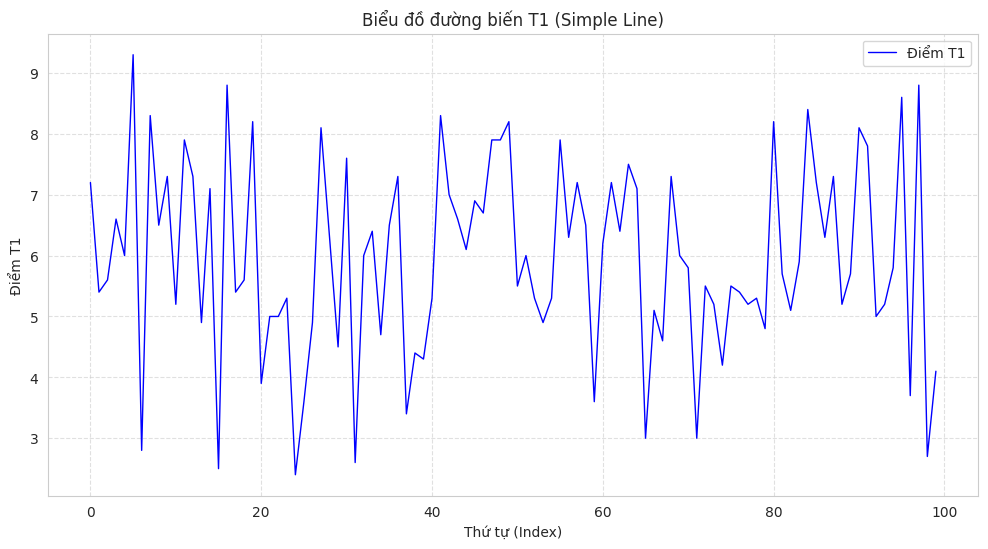


--- 2. Tạo biến phân loại phanlopt1 ---
    T1 phanlopt1
0  7.2        kh
1  5.4        tb
2  5.6        tb
3  6.6        tb
4  6.0        tb

--- 3. Bảng tần số cho phanlopt1 ---
phanlopt1
tb    46
k     23
kh    19
g     12
Name: count, dtype: int64

--- 4. Biểu đồ Multiple Line cho T1 theo phân lớp ---


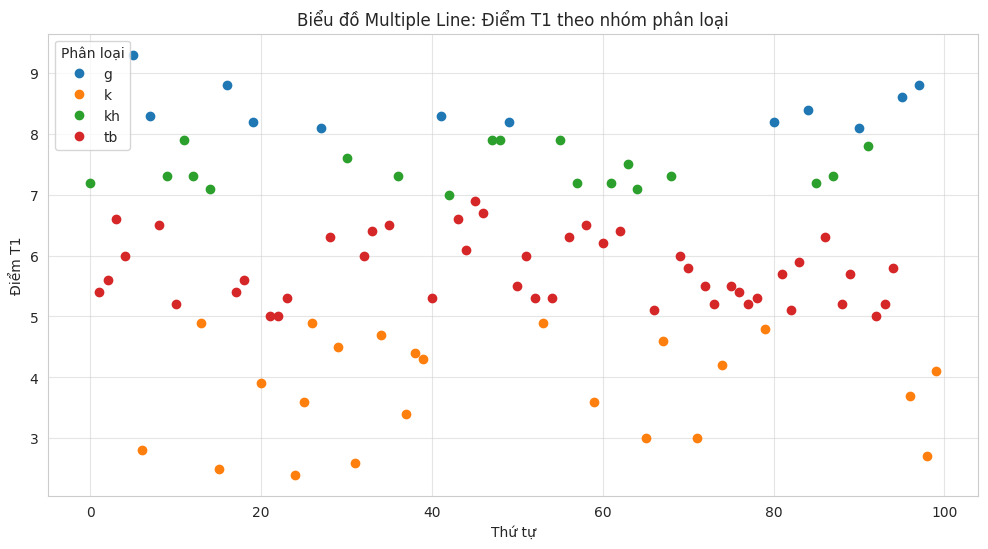


--- 5. Biểu đồ Drop-line cho T1 theo phân lớp ---


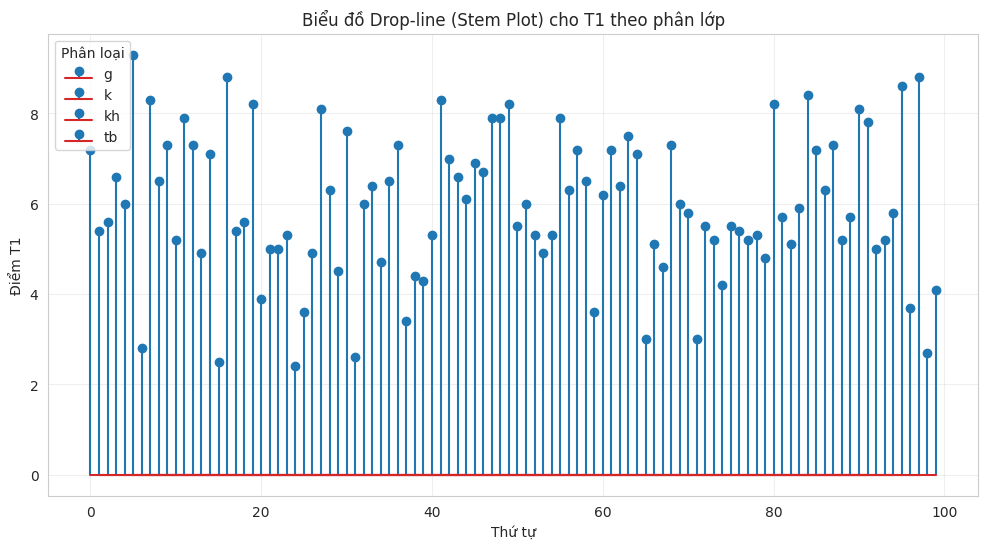

In [17]:
# 1: VẼ BIỂU ĐỒ ĐƯỜNG SIMPLE CHO BIẾN T1
print("\n--- 1. Biểu đồ đường (Simple Line) cho T1 ---")
plt.figure(figsize=(12, 6))
# Vẽ đường nối các điểm T1 theo thứ tự Index
plt.plot(df.index, df['T1'], label='Điểm T1', color='blue', linewidth=1)
plt.title('Biểu đồ đường biến T1 (Simple Line)')
plt.xlabel('Thứ tự (Index)')
plt.ylabel('Điểm T1')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2: TẠO BIẾN PHÂN LOẠI (phanlopt1)
print("\n--- 2. Tạo biến phân loại phanlopt1 ---")
# Định nghĩa hàm phân loại
def phan_loai_t1(diem):
    if diem < 5:
        return 'k'   # Kém
    elif diem < 7:
        return 'tb'  # Trung bình
    elif diem < 8:
        return 'kh'  # Khá (Dùng 'kh' để khác 'k' của Kém)
    else:
        return 'g'   # Giỏi

# Áp dụng hàm vào cột T1
df['phanlopt1'] = df['T1'].apply(phan_loai_t1)
print(df[['T1', 'phanlopt1']].head())

# 3: LẬP BẢNG TẦN SỐ CHO phanlopt1
print("\n--- 3. Bảng tần số cho phanlopt1 ---")
bang_tan_so = df['phanlopt1'].value_counts()
print(bang_tan_so)

# 4: VẼ BIỂU ĐỒ MULTIPLE LINE CHO T1 THEO phanlopt1
print("\n--- 4. Biểu đồ Multiple Line cho T1 theo phân lớp ---")
plt.figure(figsize=(12, 6))

# Vẽ từng nhóm đường riêng biệt trên cùng một trục
# Nhóm theo biến phân loại và vẽ
groups = df.groupby('phanlopt1')
for name, group in groups:
    plt.plot(group.index, group['T1'], marker='o', linestyle='', label=name)

plt.title('Biểu đồ Multiple Line: Điểm T1 theo nhóm phân loại')
plt.xlabel('Thứ tự')
plt.ylabel('Điểm T1')
plt.legend(title='Phân loại')
plt.grid(True, alpha=0.5)
plt.show()

# 5: VẼ BIỂU ĐỒ DROP-LINE CHO T1 THEO phanlopt1
print("\n--- 5. Biểu đồ Drop-line cho T1 theo phân lớp ---")
plt.figure(figsize=(12, 6))

# Drop-line thường được vẽ bằng hàm stem (cọng hành/thân cây) trong matplotlib
# Để phân biệt màu sắc theo nhóm, ta lặp qua từng nhóm
for name, group in groups:
    # markerline: đầu điểm, stemlines: đường dọc, baseline: đường ngang
    markerline, stemlines, baseline = plt.stem(group.index, group['T1'], label=name)
    # Tùy chỉnh màu sắc nếu muốn (matplotlib sẽ tự động xoay vòng màu)

plt.title('Biểu đồ Drop-line (Stem Plot) cho T1 theo phân lớp')
plt.xlabel('Thứ tự')
plt.ylabel('Điểm T1')
plt.legend(title='Phân loại')
plt.grid(True, alpha=0.3)
plt.show()

# 5: Mô tả dữ liệu và khảo sát dạng phân phối


 1. KHẢO SÁT PHÂN PHỐI BIẾN T1
--- Các đại lượng thống kê mô tả ---
Mean (Trung bình): 5.95
Median (Trung vị): 5.85
Mode (Yếu vị): 5.2
Std (Độ lệch chuẩn): 1.61
Min: 2.4
Max: 9.3
Q1 (25%): 5.0
Q3 (75%): 7.2
IQR: 2.20
Skewness (Độ lệch): -0.1782
Kurtosis (Độ nhọn): -0.4801
=> Phân phối lệch trái (Negative Skew)
=> Phân phối bẹt hơn chuẩn (Platykurtic)


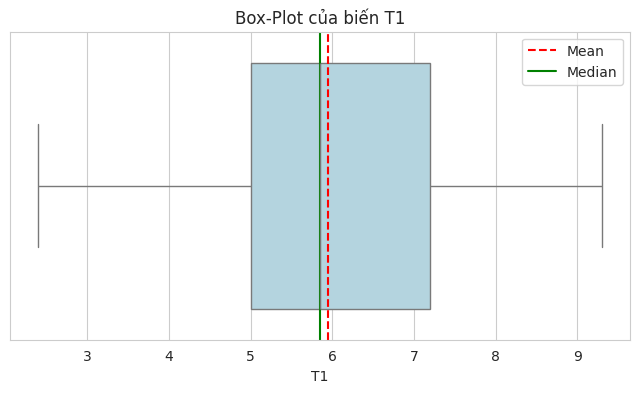

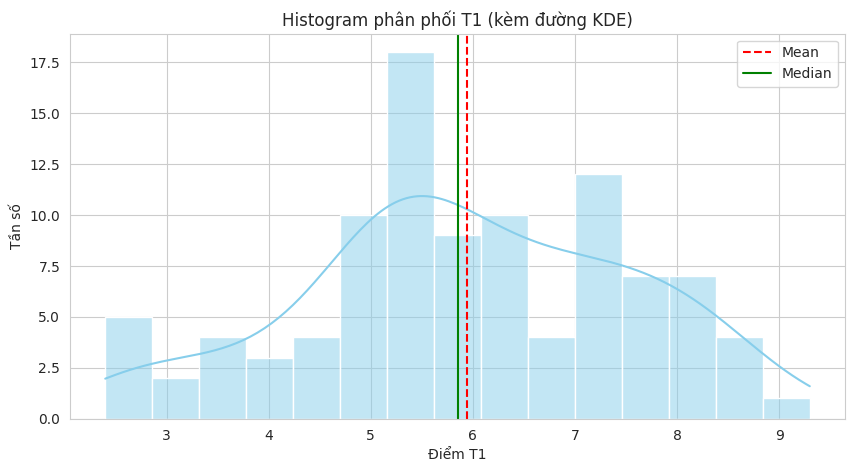

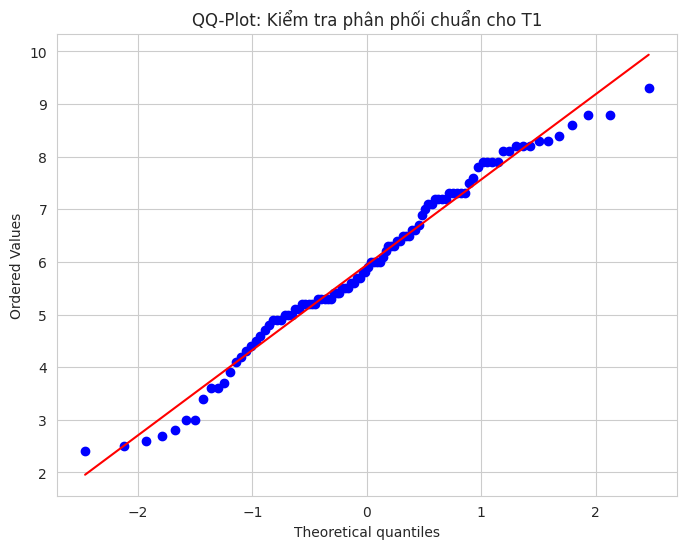


 2. KHẢO SÁT T1 THEO NHÓM (phanlopt1)


/tmp/ipython-input-1107568683.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='phanlopt1', y='T1', order=['k', 'tb', 'kh', 'g'], palette='Set3')


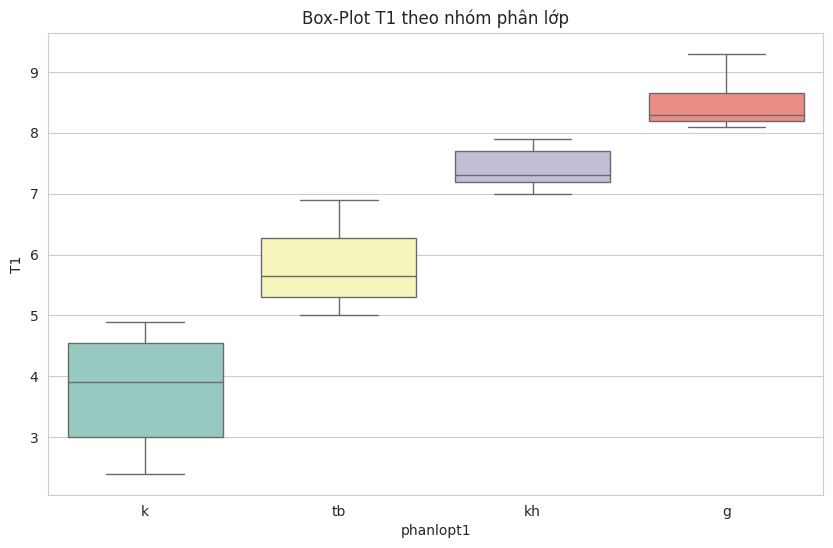

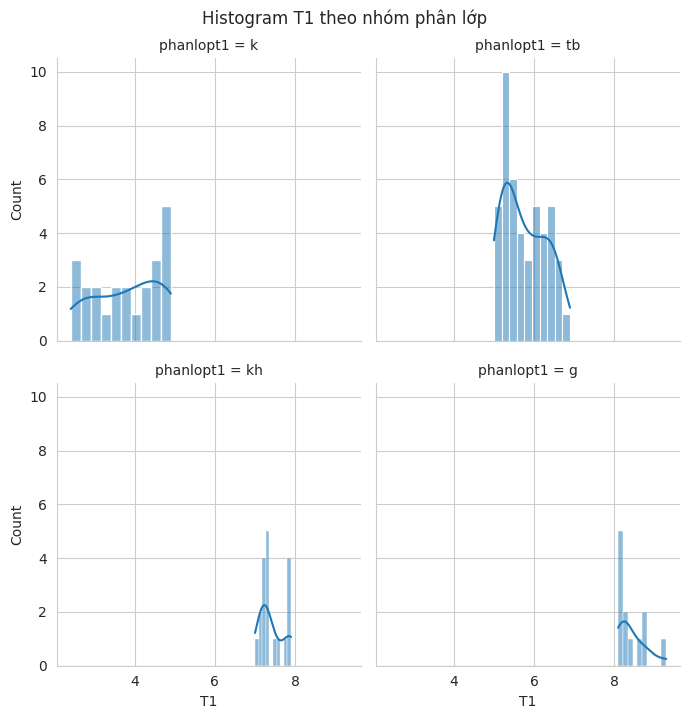

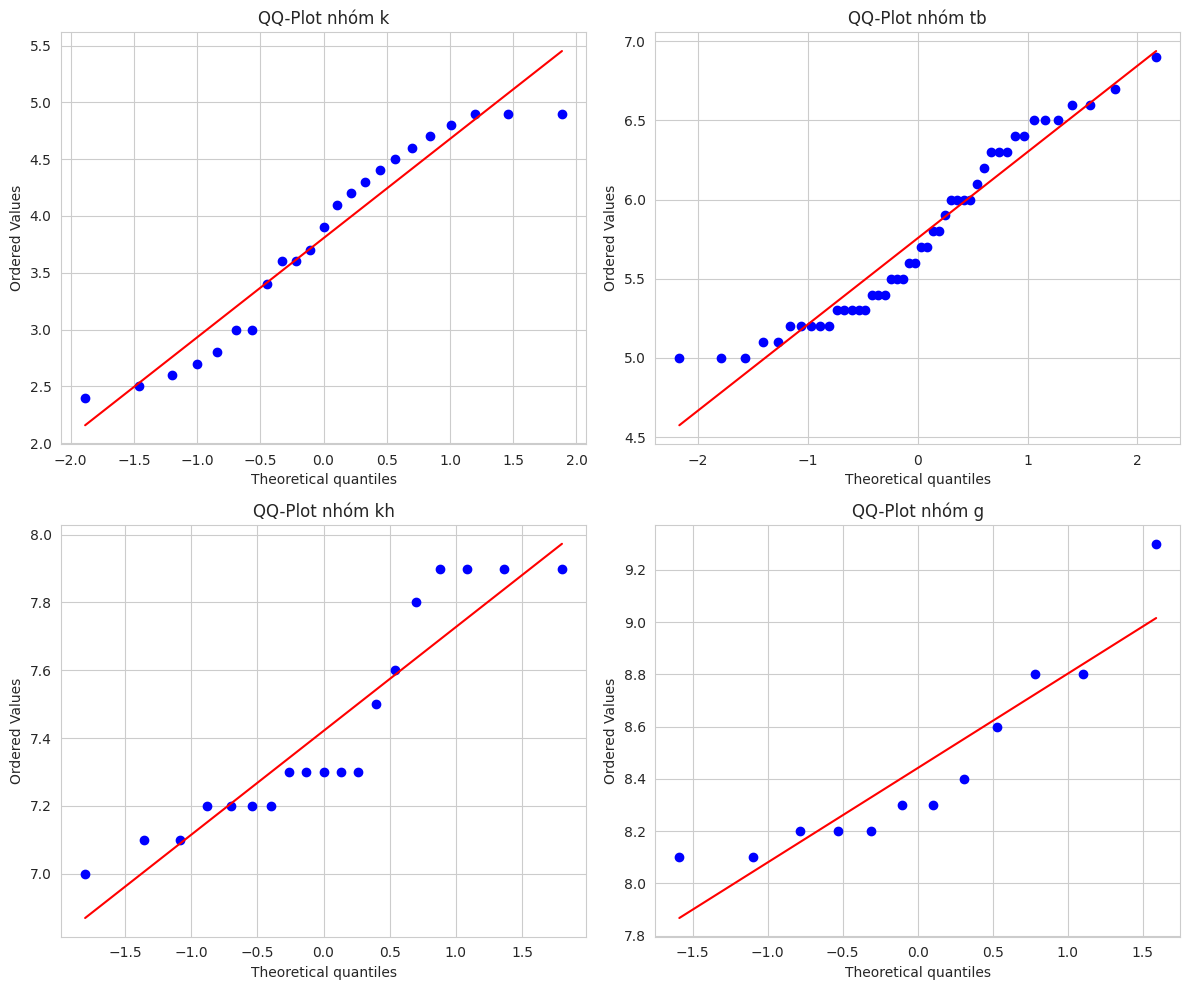


 3. TƯƠNG QUAN DH1 VÀ T1
Covariance (Hiệp phương sai) T1-DH1: 0.1128
Correlation (Hệ số tương quan) T1-DH1: 0.0493
=> Tương quan yếu


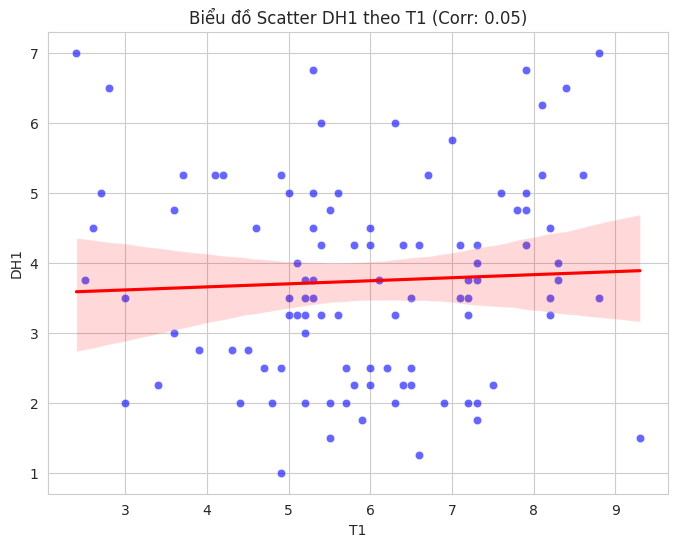


 4. TƯƠNG QUAN DH1 VÀ T1 THEO KHU VỰC (KV)


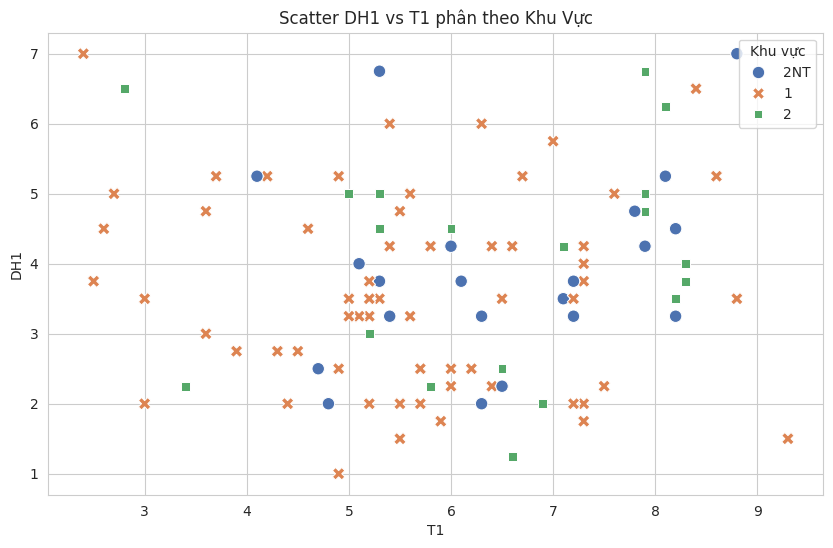

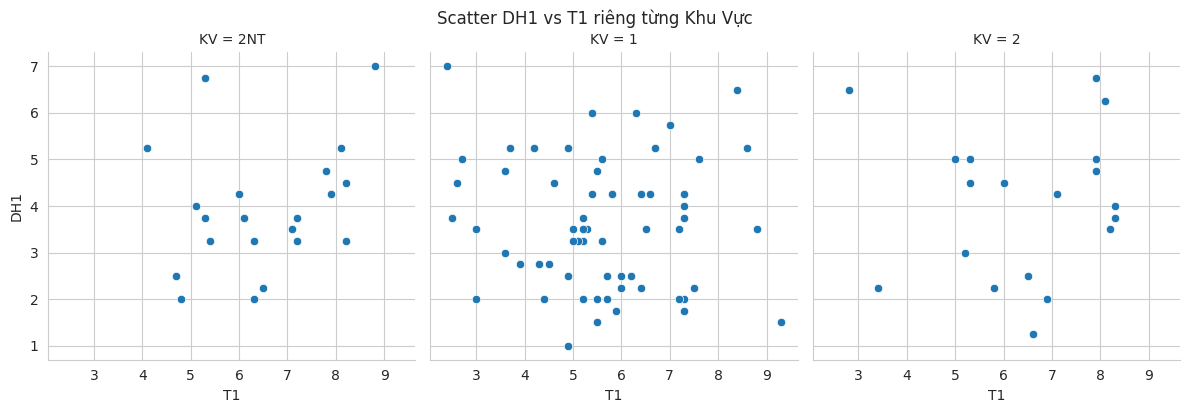


 5. TƯƠNG QUAN DH1, DH2, DH3
--- Ma trận Hiệp phương sai (Covariance Matrix) ---
          DH1       DH2       DH3
DH1  2.028939  0.053081  0.027778
DH2  0.053081  1.123712 -0.101010
DH3  0.027778 -0.101010  1.083965

--- Ma trận Tương quan (Correlation Matrix) ---
          DH1       DH2       DH3
DH1  1.000000  0.035154  0.018731
DH2  0.035154  1.000000 -0.091523
DH3  0.018731 -0.091523  1.000000


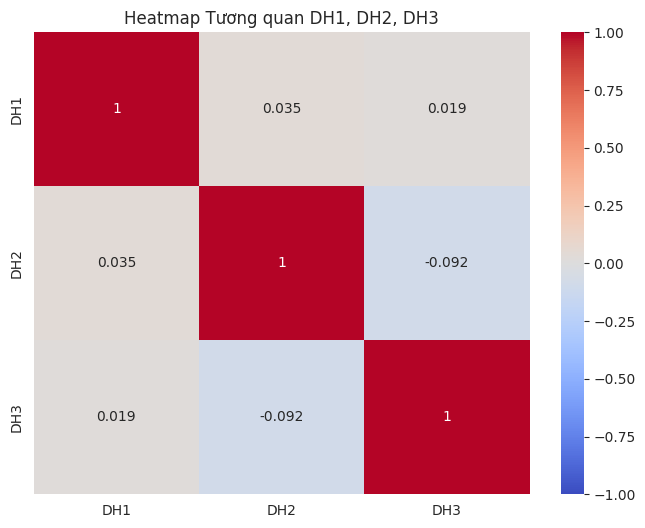

Đang vẽ Pairplot...


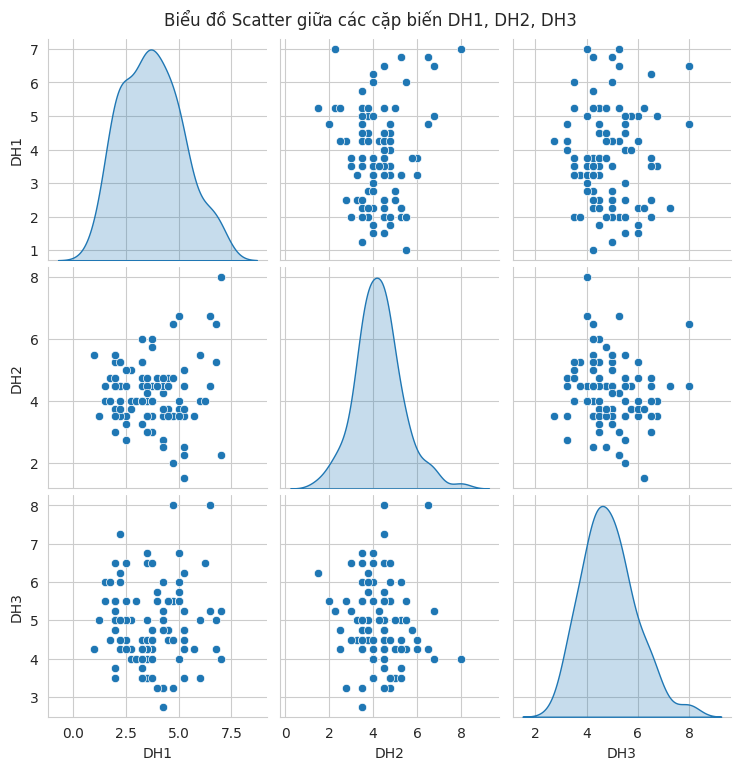

In [20]:
# --- TẠO BIẾN PHÂN LỚP T1 (phanlopt1) ---
def phan_loai_t1(diem):
    if diem < 5: return 'k'
    elif diem < 7: return 'tb'
    elif diem < 8: return 'kh'
    else: return 'g'

df['phanlopt1'] = df['T1'].apply(phan_loai_t1)

# 1: MÔ TẢ VÀ KHẢO SÁT PHÂN PHỐI BIẾN T1
print("\n" + "="*40 + "\n 1. KHẢO SÁT PHÂN PHỐI BIẾN T1\n" + "="*40)

# 1.1 Mô tả độ tập trung và phân tán
desc_stats = df['T1'].describe()
mean_val = df['T1'].mean()
median_val = df['T1'].median()
mode_val = df['T1'].mode()[0]
std_val = df['T1'].std()
skew_val = df['T1'].skew()
kurt_val = df['T1'].kurtosis()

# Tính các đại lượng cho Box-Plot (Q1, Q3, IQR, Fence)
Q1 = df['T1'].quantile(0.25)
Q3 = df['T1'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

print("--- Các đại lượng thống kê mô tả ---")
print(f"Mean (Trung bình): {mean_val:.2f}")
print(f"Median (Trung vị): {median_val:.2f}")
print(f"Mode (Yếu vị): {mode_val}")
print(f"Std (Độ lệch chuẩn): {std_val:.2f}")
print(f"Min: {desc_stats['min']}")
print(f"Max: {desc_stats['max']}")
print(f"Q1 (25%): {Q1}")
print(f"Q3 (75%): {Q3}")
print(f"IQR: {IQR:.2f}")
print(f"Skewness (Độ lệch): {skew_val:.4f}")
print(f"Kurtosis (Độ nhọn): {kurt_val:.4f}")

# Đánh giá sơ bộ về hình dáng
if skew_val > 0: print("=> Phân phối lệch phải (Positive Skew)")
elif skew_val < 0: print("=> Phân phối lệch trái (Negative Skew)")
else: print("=> Phân phối đối xứng")

if kurt_val > 0: print("=> Phân phối nhọn hơn chuẩn (Leptokurtic)")
elif kurt_val < 0: print("=> Phân phối bẹt hơn chuẩn (Platykurtic)")

# 1.2 Vẽ biểu đồ Box-Plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['T1'], color='lightblue')
plt.title('Box-Plot của biến T1')
plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
plt.axvline(median_val, color='green', linestyle='-', label='Median')
plt.legend()
plt.show()

# 1.3 Vẽ biểu đồ Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['T1'], kde=True, color='skyblue', bins=15)
plt.title('Histogram phân phối T1 (kèm đường KDE)')
plt.xlabel('Điểm T1')
plt.ylabel('Tần số')
plt.axvline(mean_val, color='red', linestyle='--', label='Mean')
plt.axvline(median_val, color='green', linestyle='-', label='Median')
plt.legend()
plt.show()

# 1.4 Kiểm chứng phân phối chuẩn QQ-Plot
plt.figure(figsize=(8, 6))
stats.probplot(df['T1'], dist="norm", plot=plt)
plt.title('QQ-Plot: Kiểm tra phân phối chuẩn cho T1')
plt.show()

# 2: KHẢO SÁT T1 TRÊN TỪNG NHÓM PHÂN LỚP (phanlopt1)
print("\n" + "="*40 + "\n 2. KHẢO SÁT T1 THEO NHÓM (phanlopt1)\n" + "="*40)

# 2.1 Box-plot theo nhóm
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='phanlopt1', y='T1', order=['k', 'tb', 'kh', 'g'], palette='Set3')
plt.title('Box-Plot T1 theo nhóm phân lớp')
plt.show()

# 2.2 Histogram theo nhóm (Dùng FacetGrid)
g = sns.FacetGrid(df, col="phanlopt1", col_wrap=2, col_order=['k', 'tb', 'kh', 'g'], height=3.5)
g.map(sns.histplot, "T1", kde=True, bins=10)
g.fig.suptitle('Histogram T1 theo nhóm phân lớp', y=1.02)
plt.show()

# 2.3 QQ-Plot theo nhóm
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
groups = ['k', 'tb', 'kh', 'g']
axes = axes.flatten()

for i, group in enumerate(groups):
    data_group = df[df['phanlopt1'] == group]['T1']
    if len(data_group) > 0:
        stats.probplot(data_group, dist="norm", plot=axes[i])
        axes[i].set_title(f'QQ-Plot nhóm {group}')
    else:
        axes[i].set_title(f'Nhóm {group} (Không có dữ liệu)')

plt.tight_layout()
plt.show()

# 3: TƯƠNG QUAN GIỮA DH1 VÀ T1
print("\n" + "="*40 + "\n 3. TƯƠNG QUAN DH1 VÀ T1\n" + "="*40)

# Tính Covariance và Correlation
cov_val = df[['T1', 'DH1']].cov().iloc[0, 1]
corr_val = df[['T1', 'DH1']].corr().iloc[0, 1]

print(f"Covariance (Hiệp phương sai) T1-DH1: {cov_val:.4f}")
print(f"Correlation (Hệ số tương quan) T1-DH1: {corr_val:.4f}")

if abs(corr_val) > 0.7: print("=> Tương quan mạnh")
elif abs(corr_val) > 0.5: print("=> Tương quan trung bình")
else: print("=> Tương quan yếu")

# Vẽ Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='T1', y='DH1', color='blue', alpha=0.6)
# Vẽ đường xu hướng tuyến tính (Regression line)
sns.regplot(data=df, x='T1', y='DH1', scatter=False, color='red')
plt.title(f'Biểu đồ Scatter DH1 theo T1 (Corr: {corr_val:.2f})')
plt.show()

# 4: TƯƠNG QUAN DH1 VÀ T1 TRÊN TỪNG KHU VỰC
print("\n" + "="*40 + "\n 4. TƯƠNG QUAN DH1 VÀ T1 THEO KHU VỰC (KV)\n" + "="*40)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='T1', y='DH1', hue='KV', style='KV', palette='deep', s=80)
plt.title('Scatter DH1 vs T1 phân theo Khu Vực')
plt.legend(title='Khu vực')
plt.show()

# Hoặc tách riêng từng biểu đồ (Faceted)
g = sns.FacetGrid(df, col="KV", height=4)
g.map(sns.scatterplot, "T1", "DH1")
g.fig.suptitle('Scatter DH1 vs T1 riêng từng Khu Vực', y=1.02)
plt.show()

# 5: TƯƠNG QUAN GIỮA DH1, DH2, DH3
print("\n" + "="*40 + "\n 5. TƯƠNG QUAN DH1, DH2, DH3\n" + "="*40)

cols_dh = ['DH1', 'DH2', 'DH3']

# Ma trận hiệp phương sai
print("--- Ma trận Hiệp phương sai (Covariance Matrix) ---")
print(df[cols_dh].cov())

# Ma trận tương quan
print("\n--- Ma trận Tương quan (Correlation Matrix) ---")
corr_matrix = df[cols_dh].corr()
print(corr_matrix)

# Heatmap trực quan hóa ma trận tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap Tương quan DH1, DH2, DH3')
plt.show()

# Scatter Matrix (Pairplot)
print("Đang vẽ Pairplot...")
sns.pairplot(df[cols_dh], kind='scatter', diag_kind='kde')
plt.suptitle('Biểu đồ Scatter giữa các cặp biến DH1, DH2, DH3', y=1.02)
plt.show()